In [3]:
# pip install seaborn jupyterlab

In [4]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so
from pandas import DataFrame

In [11]:
df: DataFrame = pd.read_json('lofi_acl/valley-4-100000-results.json')
df = df.map(lambda x: x / 1_000_000 / 1000) # in ms avg for 1000
df

,valley-full-mesh-no-acl,valley-central-no-acl,valley-no-acl,valley-full-mesh,valley-central,valley
0,0.009553,0.009700,0.020726,0.014006,0.013245,0.049755
1,0.011060,0.011489,0.020188,0.014347,0.014556,0.048596
2,0.016956,0.017440,0.026376,0.019140,0.020013,0.046262
3,0.021030,0.021546,0.028744,0.028550,0.022255,0.045357
4,0.023799,0.024210,0.030344,0.028767,0.025418,0.035174
...,...,...,...,...,...,...
95,0.070630,0.071590,0.076179,0.059271,0.059680,0.070031
96,0.069805,0.074950,0.081688,0.063546,0.059038,0.065439
97,0.071960,0.070873,0.079972,0.061906,0.065275,0.066648
98,0.079632,0.076807,0.082357,0.063594,0.064241,0.066950


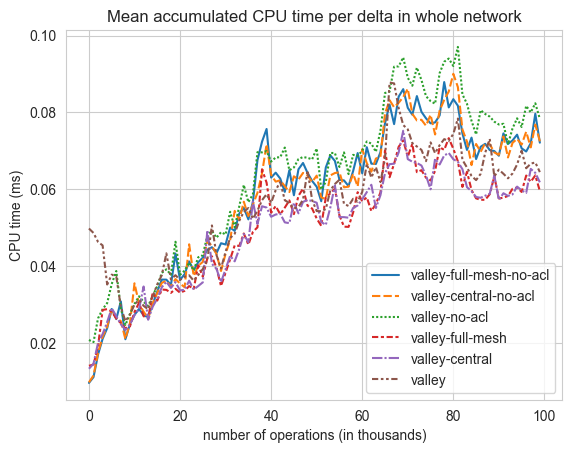

In [6]:
axs = sns.lineplot(df)
#thousands_ticks = [int(i+1) * 1000 for i in df.index]
#plt.xticks(ticks=df.index, labels=thousands_ticks)
axs.set_title('Mean accumulated CPU time per delta in whole network')
plt.xlabel('number of operations (in thousands)')
plt.ylabel('CPU time (ms)')
plt.show()

handles, labels = axs.get_legend_handles_labels()
axs.legend(handles, labels)

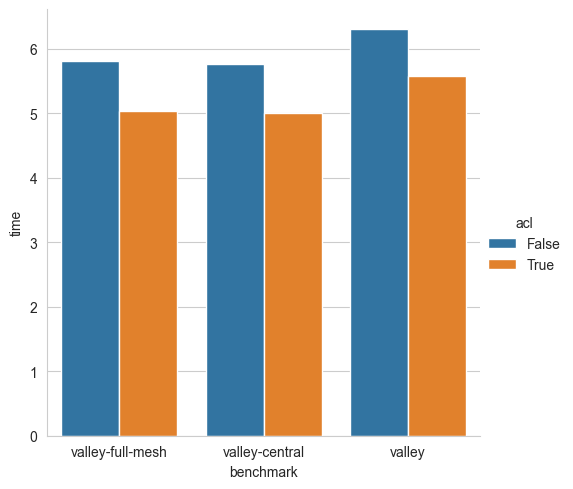

In [10]:
series = series = df.sum(axis=0)
summed_df = pd.DataFrame({'benchmark':series.index, 'time':series.values})
summed_df['acl'] = summed_df['benchmark'].map(lambda name: not name.endswith("-no-acl"))
summed_df['benchmark'] = summed_df['benchmark'].map(lambda name: name.removesuffix("-no-acl"))
axs = sns.catplot(summed_df, x='benchmark', y='time', kind='bar', hue='acl')

label_dict = {
    'valley-full-mesh': 'full mesh',
    'valley-central': 'central server',
    'valley': 'diamond'
}
#handles, labels = axs.ax.get_legend_handles_labels()
#axs.ax.legend(handles, map(lambda lbl: label_dict.get(lbl), labels))

#plt.xticks(rotation=-45)
plt.show()

In [6]:
summed_df.groupby('acl').head()

,benchmark,time,acl
0,valley-full-mesh,5.812461,False
1,valley-central,5.760260,False
2,valley,6.298980,False
3,valley-full-mesh,5.029484,True
4,valley-central,5.000050,True
5,valley,5.569585,True
